In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import json
import ast

In [20]:
#Kelley Harris Data
df = pd.read_json('../data/other_virus_spectra.json')
df = df.T
df.index.name = 'virus_name'
df = df.reset_index()
virus_mitspec_df = pd.DataFrame()
for virus_name in list(df['virus_name']):
    virus_dict = ast.literal_eval(str(df.loc[df['virus_name']==virus_name, 
                                             'mutation_spectrum'].values).replace('[{','{').replace('}]','}').replace('to','>'))
    one_virus_dict = pd.DataFrame([virus_dict])
    virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
virus_mitspec_df['virus_name'] = list(df['virus_name'])
columns = list(virus_mitspec_df.columns)
columns.remove('virus_name')
virus_mitspec_df['total'] = virus_mitspec_df[columns].sum(axis=1)
for col in columns:
    virus_mitspec_df[col] = virus_mitspec_df[col]/virus_mitspec_df['total']
virus_mitspec_df = virus_mitspec_df.drop('total',axis=1)

C:\Users\voron\AppData\Local\Temp\ipykernel_97372\3090101402.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\3090101402.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\3090101402.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\3090101402.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitsp

In [21]:
virus_mitspec_df.head()

,T>G,C>T,T>C,A>G,G>A,A>T,C>A,T>A,A>C,G>T,C>G,G>C,virus_name
0,0.013431,0.196083,0.157439,0.131938,0.335605,0.018434,0.067506,0.019876,0.013002,0.039958,0.002099,0.004628,flu_h3n2
0,0.015716,0.194899,0.156519,0.122620,0.325181,0.022171,0.066162,0.025369,0.015630,0.045243,0.004931,0.005561,flu_h1n1pdm
0,0.010400,0.211020,0.133855,0.120362,0.379445,0.011133,0.060726,0.016327,0.010306,0.040934,0.002884,0.002609,flu_vic
0,0.010085,0.223910,0.144512,0.117671,0.366943,0.010157,0.062121,0.013412,0.007849,0.036883,0.003053,0.003405,flu_yam
0,0.008174,0.290197,0.120245,0.070279,0.334728,0.038923,0.053017,0.033842,0.007703,0.040141,0.002418,0.000332,rsv-a


In [22]:
#Nemu data
viruses_specs = pd.read_csv('../data/ms12syn_all_virus.csv')
viruses_type = pd.read_csv('../data/taxid_virus_type.csv')
viruses_type['taxid'] = viruses_type['taxid'].apply(str)
viruses_specs['taxid'] = viruses_specs['taxid'].apply(str)

In [23]:
# without sars like
#viruses_specs = viruses_specs[~(viruses_specs.taxid.isin(['694014', '693997']))]

In [24]:
nemu_specs = viruses_specs.pivot(index='taxid', columns='Mut', values='MutSpec').reset_index()
nemu_specs = nemu_specs.rename_axis(None, axis=1)
nemu_specs = nemu_specs.rename(columns={"taxid": "virus_name"})

In [25]:
#SARS-CoV-2 spec
clade_df = pd.read_csv('../data/rates_by_clade.csv')
clade_df = clade_df[['clade', 'mut_type', 'rate']]
clade_df['mut_type'] = clade_df['mut_type'].str.replace('to','>')
clade_df = clade_df[clade_df['clade']=='20A']
pca_df = clade_df.pivot(index='clade', columns='mut_type', values='rate').rename_axis(index=None, columns=None)
pca_df.index.name = 'virus_name'
pca_df = pca_df.reset_index()
pca_df['virus_name'] = 'SARS-CoV-2 20A'

columns = list(pca_df.columns)
columns.remove('virus_name')
pca_df['total'] = pca_df[columns].sum(axis=1)
for col in columns:
    pca_df[col] = pca_df[col]/pca_df['total']
pca_df = pca_df.drop('total',axis=1)

In [26]:
virus_mitspec_df = virus_mitspec_df.append(pca_df)
virus_mitspec_df = virus_mitspec_df.append(nemu_specs)

C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4106057926.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(pca_df)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4106057926.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(nemu_specs)


In [27]:
clade_names = virus_mitspec_df['virus_name']
pca_data_only = virus_mitspec_df.drop('virus_name', axis=1)
model = PCA(n_components=12).fit(pca_data_only)
pca_model = model.transform(pca_data_only)
#pca_model = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()

In [28]:
categories = list(virus_mitspec_df['virus_name'].unique())
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
virus_mitspec_df["Color"] = virus_mitspec_df['virus_name'].apply(lambda x: colordict[x])

In [29]:
virus_mitspec_df = virus_mitspec_df.reset_index(drop=True)

In [30]:
virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['flu_h3n2',
 'flu_h1n1pdm',
 'flu_vic',
 'flu_yam',
 'rsv-a',
 'rsv-b']), "RNAsense"] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['evD68',
 'evA71',
 'denv1',
 'denv2',
 'denv3',
 'denv4',
 'WNV', 'SARS-CoV-2 20A']), "RNAsense"] = '+ Rna'
 #'SARS-CoV-2 20A'

In [31]:
viruses_type = viruses_type.rename(columns={"taxid": "virus_name", "Type" : "RNAsense"})
viruses_type = viruses_type[['virus_name', "RNAsense"]]
virus_mitspec_df = virus_mitspec_df.merge(viruses_type, how='left', on='virus_name')
virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['11320_1', '11320_2', '3052493', '1133363', '3052763']), 'RNAsense_x'] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['+']), "RNAsense_x"] = '+ Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['-']), "RNAsense_x"] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['ds']), "RNAsense_x"] = 'ds Rna'
virus_mitspec_df = virus_mitspec_df.rename(columns={"RNAsense_x": "RNAsense"})
virus_mitspec_df = virus_mitspec_df.drop('RNAsense_y', axis=1)

ldngs = model.components_
features = pca_data_only.columns

In [35]:
pca_data1['strand'] = virus_mitspec_df['RNAsense']
pca_data1['virus_name'] = virus_mitspec_df['virus_name']
pca_data1.loc[(pca_data1['pc2'] > 0.05) & (pca_data1['pc1'] < 0.05) & (pca_data1['strand'] == '+ Rna'), 'strand'] = 'CoV like'

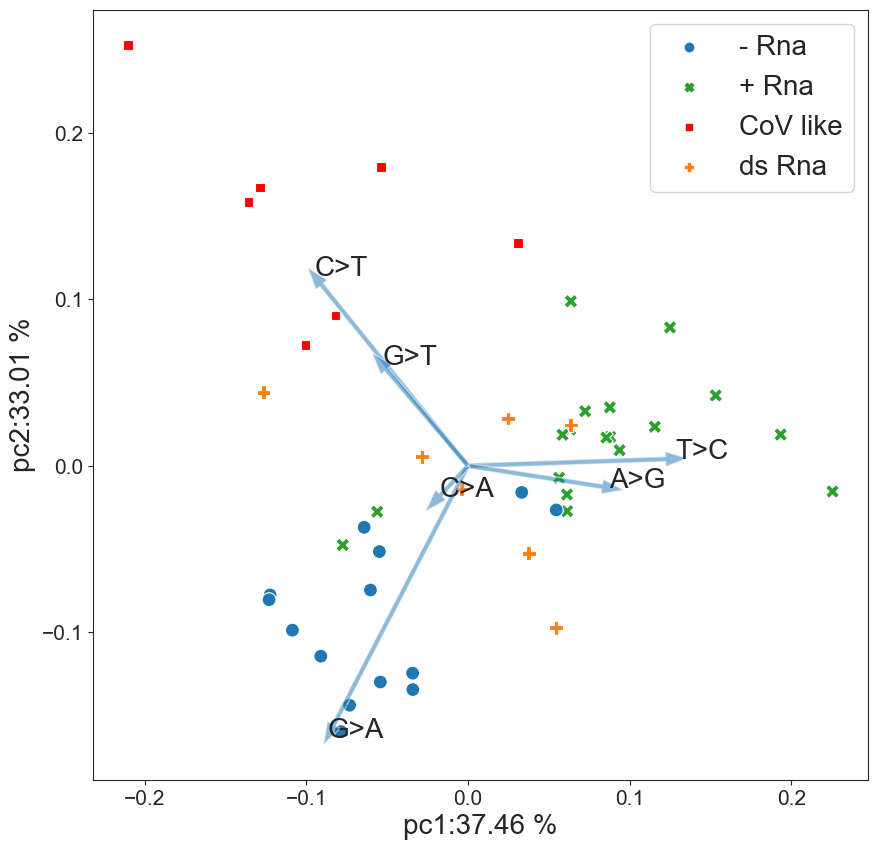

In [41]:

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['legend.fontsize'] = 'large'


sns.set_style("ticks")

palette = {
    'ds Rna': 'tab:orange',
    '+ Rna': 'tab:green',
    'CoV like': 'red',
    '- Rna' : 'tab:blue'
}
ax4 = sns.scatterplot(data=pca_data1, 
                x="pc1", 
                y="pc2", 
                hue='strand', palette=palette, style='strand', s=100) #hue=virus_mitspec_df['virus_name'],

for i, feature in enumerate(features):
    if feature in (['C>T', 'G>T', 'T>C', 'A>G', 'G>A', 'C>A']):
        if ldngs[0, i]/5 > (ldngs[0]/5).mean():
            ax4.arrow(0, 0, ldngs[0, i]/5, 
                     ldngs[1, i]/5, width=0.003, alpha=0.5)
            ax4.text(ldngs[0, i]/5 * 1.05, 
                    ldngs[1, i]/5 * 1.05, 
                    feature, fontsize=20)
        else:
            ax4.arrow(0, 0, ldngs[0, i]/5, 
                     ldngs[1, i]/5, width=0.003, alpha=0.5)
            ax4.text(ldngs[0, i]/5 * 1.05, 
                    ldngs[1, i]/5 * 1.05, 
                    feature, fontsize=20)
#ax1.title("PCA visualization of viruses mutation spectrums")
ax4.set_xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=20)
ax4.set_ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=20)
ax4.tick_params(axis='y', which='major', labelsize=15)
ax4.tick_params(axis='x', which='major', labelsize=15)

ax4.legend(bbox_to_anchor=(1, 1), fontsize=20)

plt.savefig('../figures/mutspecs_pca_all.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [43]:
#Kelley Harris Data
df = pd.read_json('../data/other_virus_spectra.json')
df = df.T
df.index.name = 'virus_name'
df = df.reset_index()
virus_mitspec_df = pd.DataFrame()
for virus_name in list(df['virus_name']):
    virus_dict = ast.literal_eval(str(df.loc[df['virus_name']==virus_name, 
                                             'mutation_spectrum'].values).replace('[{','{').replace('}]','}').replace('to','>'))
    one_virus_dict = pd.DataFrame([virus_dict])
    virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
virus_mitspec_df['virus_name'] = list(df['virus_name'])
columns = list(virus_mitspec_df.columns)
columns.remove('virus_name')
virus_mitspec_df['total'] = virus_mitspec_df[columns].sum(axis=1)
for col in columns:
    virus_mitspec_df[col] = virus_mitspec_df[col]/virus_mitspec_df['total']
virus_mitspec_df = virus_mitspec_df.drop('total',axis=1)

#Nemu data
viruses_specs = pd.read_csv('../data/ms12syn_all_virus.csv')
viruses_type = pd.read_csv('../data/taxid_virus_type.csv')
viruses_type['taxid'] = viruses_type['taxid'].apply(str)
viruses_specs['taxid'] = viruses_specs['taxid'].apply(str)

viruses_specs = viruses_specs[~(viruses_specs.taxid.isin(['694014', '693997']))]

nemu_specs = viruses_specs.pivot(index='taxid', columns='Mut', values='MutSpec').reset_index()
nemu_specs = nemu_specs.rename_axis(None, axis=1)
nemu_specs = nemu_specs.rename(columns={"taxid": "virus_name"})
virus_mitspec_df = virus_mitspec_df.append(nemu_specs)

clade_names = virus_mitspec_df['virus_name']
pca_data_only = virus_mitspec_df.drop('virus_name', axis=1)
model = PCA(n_components=12).fit(pca_data_only)
pca_model = model.transform(pca_data_only)
#pca_model = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_model, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])
pca_data1 = pca_data[["pc1","pc2"]].copy()

categories = list(virus_mitspec_df['virus_name'].unique())
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
virus_mitspec_df["Color"] = virus_mitspec_df['virus_name'].apply(lambda x: colordict[x])
virus_mitspec_df = virus_mitspec_df.reset_index(drop=True)

virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['flu_h3n2',
 'flu_h1n1pdm',
 'flu_vic',
 'flu_yam',
 'rsv-a',
 'rsv-b']), "RNAsense"] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['evD68',
 'evA71',
 'denv1',
 'denv2',
 'denv3',
 'denv4',
 'WNV']), "RNAsense"] = '+ Rna'
 #'SARS-CoV-2 20A'
    
viruses_type = viruses_type.rename(columns={"taxid": "virus_name", "Type" : "RNAsense"})
viruses_type = viruses_type[['virus_name', "RNAsense"]]
virus_mitspec_df = virus_mitspec_df.merge(viruses_type, how='left', on='virus_name')
virus_mitspec_df.loc[virus_mitspec_df['virus_name'].isin(['11320_1', '11320_2', '3052493', '1133363', '3052763']), 'RNAsense_x'] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['+']), "RNAsense_x"] = '+ Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['-']), "RNAsense_x"] = '- Rna'
virus_mitspec_df.loc[virus_mitspec_df['RNAsense_y'].isin(['ds']), "RNAsense_x"] = 'ds Rna'
virus_mitspec_df = virus_mitspec_df.rename(columns={"RNAsense_x": "RNAsense"})
virus_mitspec_df = virus_mitspec_df.drop('RNAsense_y', axis=1)

ldngs = model.components_
features = pca_data_only.columns
pca_data1['strand'] = virus_mitspec_df['RNAsense']
pca_data1['virus_name'] = virus_mitspec_df['virus_name']

C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4080995606.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4080995606.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4080995606.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitspec_df = virus_mitspec_df.append(one_virus_dict)
C:\Users\voron\AppData\Local\Temp\ipykernel_97372\4080995606.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  virus_mitsp

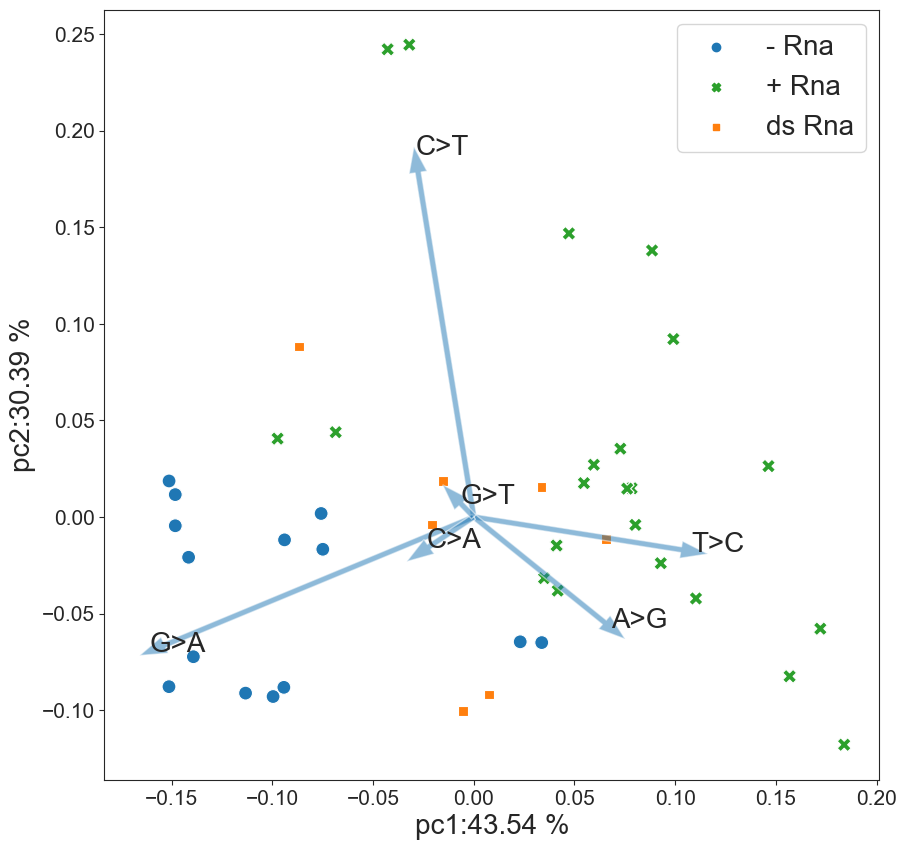

In [45]:

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['legend.fontsize'] = 'large'


sns.set_style("ticks")

palette = {
    'ds Rna': 'tab:orange',
    '+ Rna': 'tab:green',
    'CoV like': 'red',
    '- Rna' : 'tab:blue'
}
ax4 = sns.scatterplot(data=pca_data1, 
                x="pc1", 
                y="pc2", 
                hue='strand', palette=palette, style='strand', s=100) #hue=virus_mitspec_df['virus_name'],

for i, feature in enumerate(features):
    if feature in (['C>T', 'G>T', 'T>C', 'A>G', 'G>A', 'C>A']):
        if ldngs[0, i]/5 > (ldngs[0]/5).mean():
            ax4.arrow(0, 0, ldngs[0, i]/5, 
                     ldngs[1, i]/5, width=0.003, alpha=0.5)
            ax4.text(ldngs[0, i]/5 * 1.05, 
                    ldngs[1, i]/5 * 1.05, 
                    feature, fontsize=20)
        else:
            ax4.arrow(0, 0, ldngs[0, i]/5, 
                     ldngs[1, i]/5, width=0.003, alpha=0.5)
            ax4.text(ldngs[0, i]/5 * 1.05, 
                    ldngs[1, i]/5 * 1.05, 
                    feature, fontsize=20)
#ax1.title("PCA visualization of viruses mutation spectrums")
ax4.set_xlabel("pc1:" + "{:.2f}".format(model.explained_variance_ratio_[0] * 100) + " %", fontsize=20)
ax4.set_ylabel("pc2:" + "{:.2f}".format(model.explained_variance_ratio_[1] * 100) + " %", fontsize=20)
ax4.tick_params(axis='y', which='major', labelsize=15)
ax4.tick_params(axis='x', which='major', labelsize=15)

ax4.legend(bbox_to_anchor=(1, 1), fontsize=20)

plt.savefig('../figures/mutspecs_pca_nosars.pdf', bbox_inches='tight')
plt.show()
plt.close()